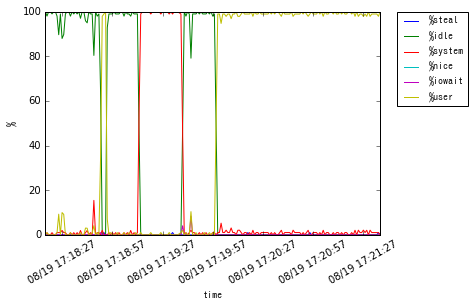

In [1]:
%matplotlib inline

import subprocess
from subprocess import Popen,PIPE
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates

def readSarCPU(f):
    args = ['/bin/bash','-c', "sadf -T --  -C " + f + " |awk '{print $3,$4,$6,$7}'"]
    p = Popen(args,stdout=PIPE,stderr=PIPE)
    out,err = p.communicate()
    cpu = {'%user': [], '%nice': [], '%system': [], '%iowait': [], '%steal': [], '%idle': []}
    timestamp = []
    x = 0
    prev = ""
    for l in out.decode('utf8').split('\n'):
        if l == "":
            break;
        r = l.split(" ")

        if prev != r[1]:
            timestamp.append(datetime.strptime(r[0]+" "+r[1], '%Y-%m-%d %H:%M:%S'))
            prev = r[1]
            x = x+1
        cpu[r[2]].append(float(r[3]))
    return (timestamp, cpu)



def plot(x, data, title="",xlabel="",ylabel=""): 

    fp = FontProperties(fname='/usr/share/fonts/ipa-gothic/ipag.ttf')
    
    if title!="":
        plt.title(title, fontproperties=fp)
    if xlabel!="":
        plt.xlabel(xlabel,fontproperties=fp)
    if ylabel!="":
        plt.ylabel(ylabel,fontproperties=fp)

    plt.xticks(rotation=30)
    xfmt = mdates.DateFormatter('%m/%d %H:%M:%S')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(xfmt)

    for k in cpu.keys():
        plt.plot(x,cpu[k], label=k)

    plt.legend(prop=fp,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

timestamp, cpu = readSarCPU("test.sar")
plot(x=timestamp, data=cpu,ylabel=u"%",xlabel=u"time")